In [1]:
from bwb.transports import SinkhornTransport, EMDTransport


In [2]:
import numpy as np

arr = np.load(r"..\data\face.npy")
arr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [3]:
from bwb.distributions import DistributionDraw

data = 255 - arr[0, :].reshape(28, 28)
dd_arr2 = DistributionDraw.fromarray(data, ceil=0, seed=42)
# 71038
data = 255 - arr[71038, :].reshape(28, 28)
dd_arr1 = DistributionDraw.fromarray(data, ceil=0, seed=42)

print(f"{len(dd_arr1.support) = }, {len(dd_arr2.support) = }")

len(dd_arr1.support) = 312, len(dd_arr2.support) = 296


# Sinkhorn

In [4]:
%%time
mst = SinkhornTransport(max_iter=10_000).fit_wm(
    Xs=np.array(dd_arr1.support),
    mu_s=np.array(dd_arr1.weights),
    Xt=np.array(dd_arr2.support),
    mu_t=np.array(dd_arr2.weights),
)
mst

CPU times: total: 766 ms
Wall time: 550 ms


Text(0.5, 1.0, 'Cost matrix M')

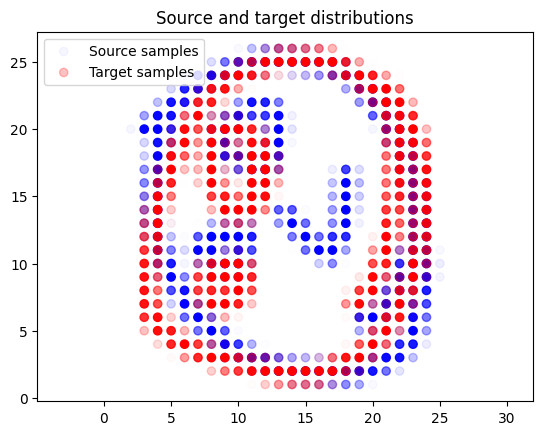

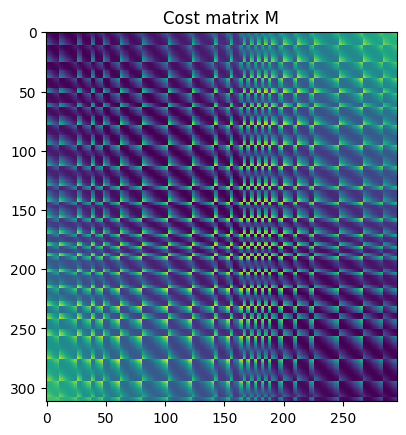

In [5]:
from matplotlib import pyplot as plt

xs, xt = np.array(mst.xs_), np.array(mst.xt_)
plt.figure(1)
plt.scatter(xs[:, 0], xs[:, 1], c='b', alpha=mst.mu_s / mst.mu_s.max(), label='Source samples')
plt.scatter(xt[:, 0], xt[:, 1], c='r', alpha=mst.mu_t / mst.mu_t.max(), label='Target samples')
plt.axis("equal")
plt.legend(loc=0)
plt.title('Source and target distributions')

plt.figure(2)
plt.imshow(mst.cost_, interpolation='nearest')
plt.title('Cost matrix M')

Text(0.5, 1.0, 'OT matrix with samples')

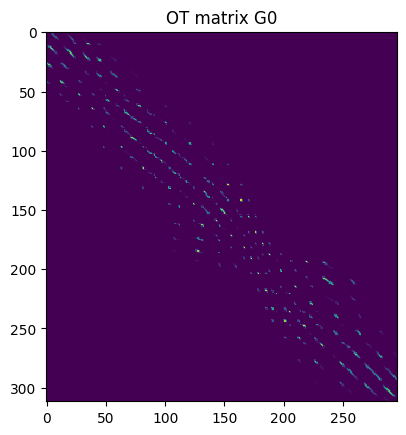

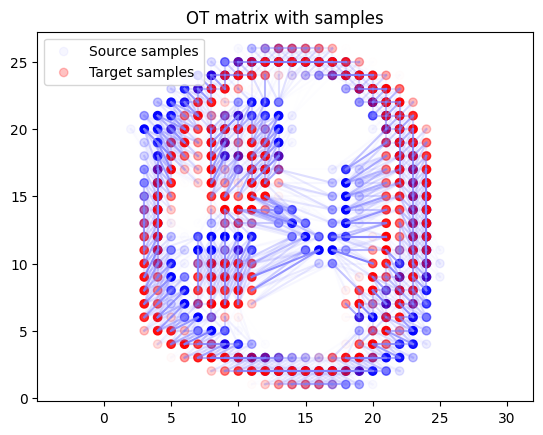

In [6]:
import ot
import ot.plot

plt.figure(3)
plt.imshow(mst.coupling_, interpolation='nearest')
plt.title('OT matrix G0')

plt.figure(4)
ot.plot.plot2D_samples_mat(xs, xt, mst.coupling_, c=[.5, .5, 1])
plt.scatter(xs[:, 0], xs[:, 1], c='b', alpha=mst.mu_s / mst.mu_s.max(), label='Source samples')
plt.scatter(xt[:, 0], xt[:, 1], c='r', alpha=mst.mu_t / mst.mu_t.max(), label='Target samples')
plt.axis("equal")
plt.legend(loc=0)
plt.title('OT matrix with samples')

# EMD

In [7]:
%%time
memdt = EMDTransport().fit_wm(
    Xs=np.array(dd_arr1.support),
    mu_s=np.array(dd_arr1.weights),
    Xt=np.array(dd_arr2.support),
    mu_t=np.array(dd_arr2.weights),
)
memdt

CPU times: total: 31.2 ms
Wall time: 39.3 ms


In [8]:
np.sum(memdt.coupling_ * memdt.cost_)

4.465135979562075

Text(0.5, 1.0, 'Cost matrix M')

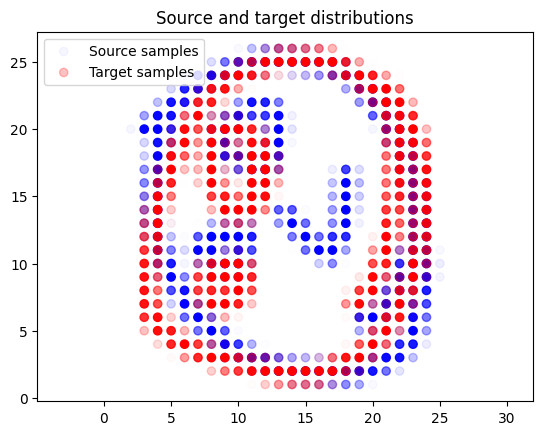

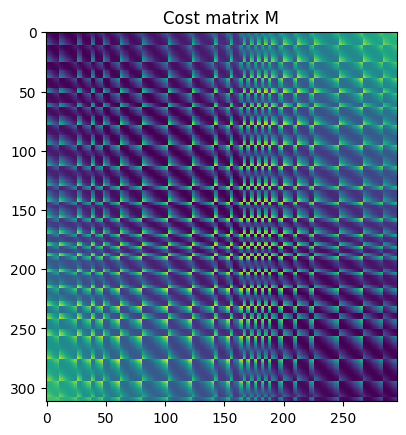

In [9]:
from matplotlib import pyplot as plt

xs, xt = np.array(memdt.xs_), np.array(memdt.xt_)
plt.figure(1)
plt.scatter(xs[:, 0], xs[:, 1], c='b', alpha=memdt.mu_s / memdt.mu_s.max(), label='Source samples')
plt.scatter(xt[:, 0], xt[:, 1], c='r', alpha=memdt.mu_t / memdt.mu_t.max(), label='Target samples')
plt.axis("equal")
plt.legend(loc=0)
plt.title('Source and target distributions')

plt.figure(2)
plt.imshow(memdt.cost_, interpolation='nearest')
plt.title('Cost matrix M')

In [10]:
xs[:, 0].shape, xs[:, 1].shape, memdt.mu_s.shape

((312,), (312,), (312,))

Text(0.5, 1.0, 'OT matrix with samples')

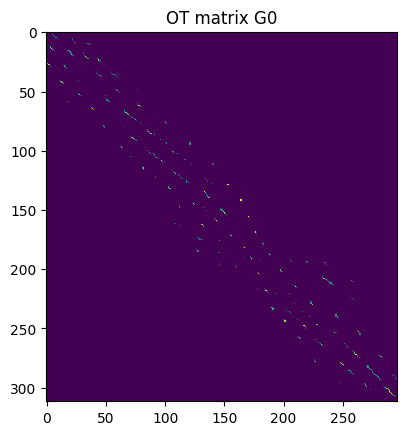

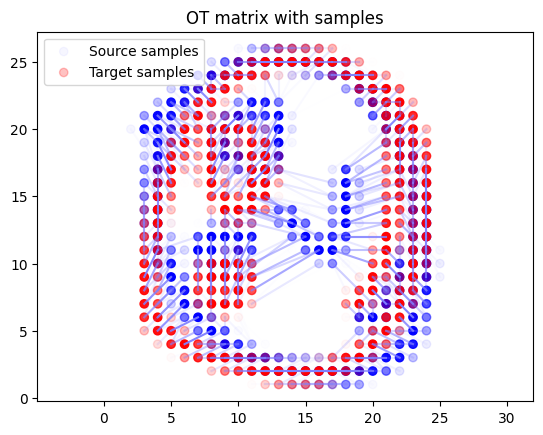

In [11]:
import ot
import ot.plot

plt.figure(3)
plt.imshow(memdt.coupling_, interpolation='nearest')
plt.title('OT matrix G0')

plt.figure(4)
ot.plot.plot2D_samples_mat(xs, xt, memdt.coupling_, c=[.5, .5, 1])
plt.scatter(xs[:, 0], xs[:, 1], c='b', alpha=memdt.mu_s / memdt.mu_s.max(), label='Source samples')
plt.scatter(xt[:, 0], xt[:, 1], c='r', alpha=memdt.mu_t / memdt.mu_t.max(), label='Target samples')
plt.axis("equal")
plt.legend(loc=0)
plt.title('OT matrix with samples')

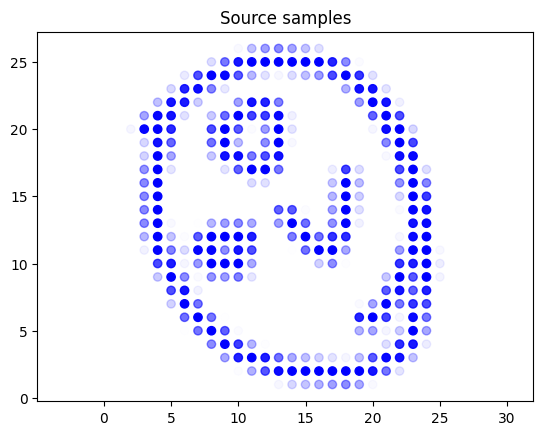

In [12]:
plt.scatter(xs[:, 0], xs[:, 1], c='b', alpha=memdt.mu_s / memdt.mu_s.max(), label='Source samples')
plt.axis("equal")
plt.title("Source samples")
plt.savefig(r"./img/source-samples")
plt.show()

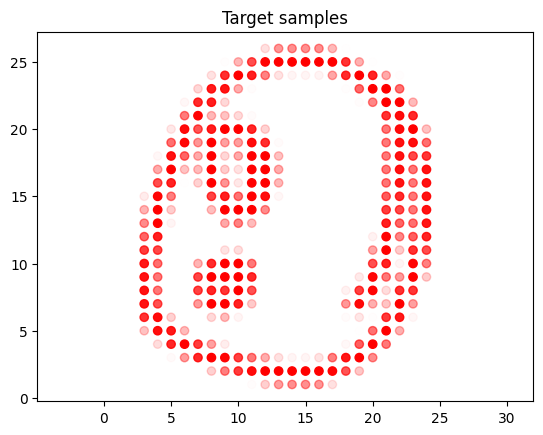

In [13]:
plt.scatter(xt[:, 0], xt[:, 1], c='r', alpha=memdt.mu_t / memdt.mu_t.max(), label='Target samples')
plt.axis("equal")
plt.title("Target samples")
plt.savefig(r"./img/target-samples")
plt.show()

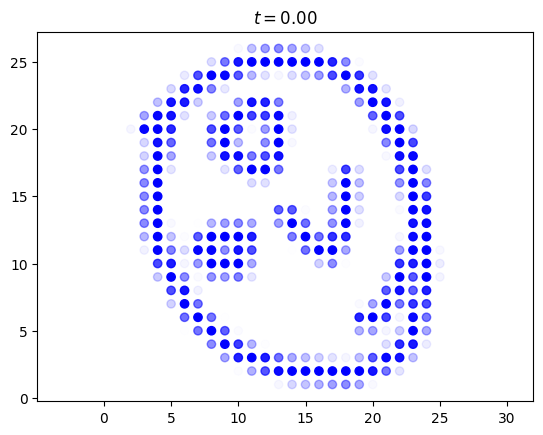

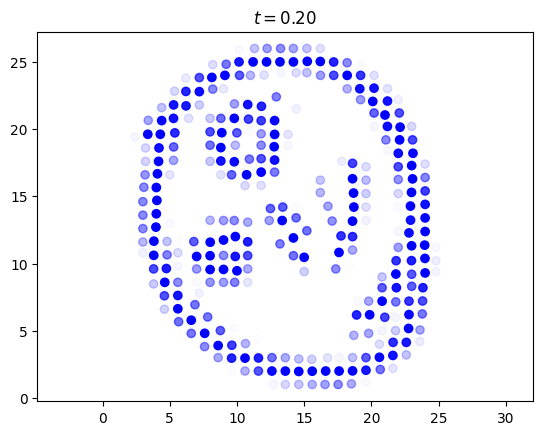

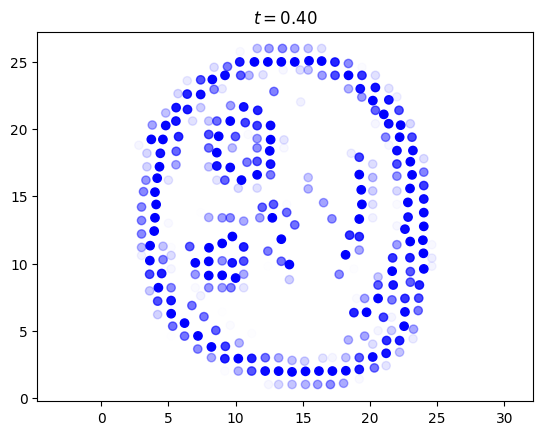

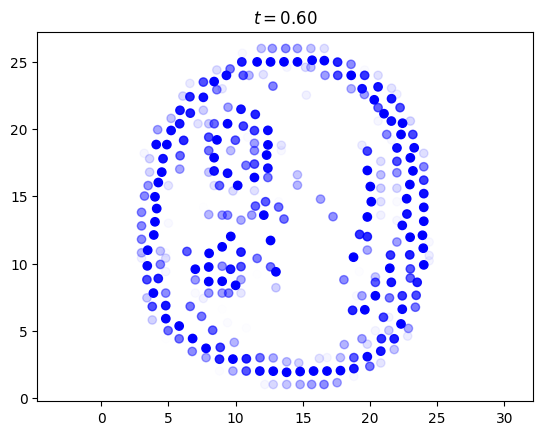

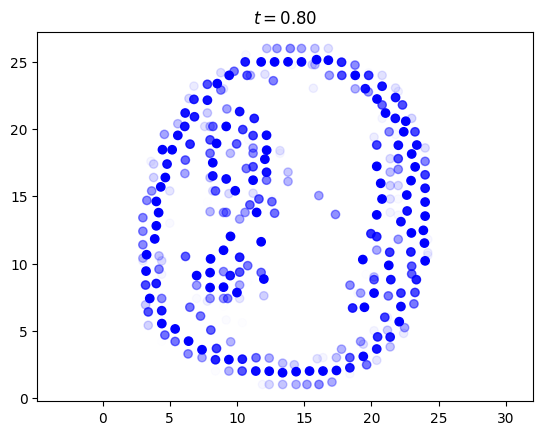

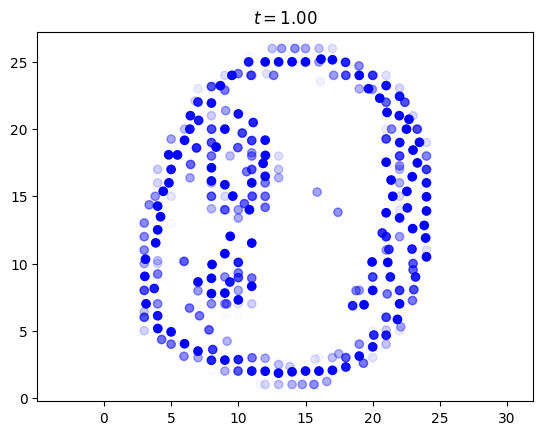

In [14]:
# trans = memdt.transform(memdt.xs_)
t_list = np.linspace(0, 1, 6)
for t in t_list:
    geod = (1-t) * memdt.xs_ + t * memdt.transform(memdt.xs_)
#     geod = np.round(geod_)
    plt.scatter(geod[:, 0], geod[:, 1], c="b", alpha=memdt.mu_s / memdt.mu_s.max())
    plt.axis("equal")
    plt.title(f"$t = {t:.2f}$")
    plt.savefig(f".//img//geod-t-{t:.2f}.png")
    plt.show()

In [ ]:
import matplotlib.animation as animation
import matplotlib.pylab as pl
from IPython.display import HTML

pl.figure(3)
n_iter_max = 100
t_list = np.linspace(0, 1, n_iter_max)
transform = memdt.transform(memdt.xs_)

def _update_plot(i):
    pl.clf()
    t = t_list[i]
    geod = (1-t) * memdt.xs_ + t * transform
    pl.scatter(geod[:, 0], geod[:, 1], c="b", alpha=memdt.mu_s / memdt.mu_s.max())
    pl.axis("equal")
    pl.title(f"$t = {t:.2f}$")
    return 1

ani = animation.FuncAnimation(pl.gcf(), _update_plot, n_iter_max, interval=100, repeat_delay=2000)
anim_html = HTML(ani.to_jshtml())
plt.close(plt.gcf())
anim_html

In [ ]:
plt.scatter(xt[:, 0], xt[:, 1], marker="s", c='r', alpha=memdt.mu_t / memdt.mu_t.max(), label='Target samples')
plt.scatter(geod[:, 0], geod[:, 1], c="b", alpha=memdt.mu_s / memdt.mu_s.max(), label="Samples transported")

plt.axis("equal")
plt.savefig(r"./img/comparision-original-transported")
# plt.legend()
plt.show()

In [ ]:

arr = np.arange(0, 256*256).reshape((256, 256))
ind = np.array([
    [1, 2], [2, 3], [0, 2]
])

# arr.take(ind[:, 1] + 3 * ind[:, 0]), ind[:, 1] + 3 * ind[:, 0]
arr

In [ ]:
def as_matrix(weights, places, shape):
    assert len(weights) == len(places), f"El tamaño de los pesos y de los puntos soporte no coinciden: {len(weights) = }, {len(places) = }"

    to_return = np.zeros(shape)
    for row, weight in zip(places.astype(int), weights):
        to_return[tuple(row)] += weight

    return to_return

mat = as_matrix(memdt.mu_s, geod, dd_arr1.shape)


In [ ]:
from bwb.utils import plot_list_of_draws
from PIL import Image

def matrix_to_image_array(matrix: np.ndarray):
    matrix_: np.ndarray = np.ceil(255 - 255 * matrix / matrix.max())
    return matrix_.astype("uint8")

im = Image.fromarray(matrix_to_image_array(mat))
plot_list_of_draws([dd_arr2, DistributionDraw(im)], labels=["original", "transported"])

# División de masas en el OT

In [ ]:
Xs, mu_s = [], []
min_w = dd_arr1.weights.min() * 3
max_w = dd_arr1.weights.max()

for x, w, n in zip(dd_arr1.support, dd_arr1.weights, np.ceil(dd_arr1.weights / min_w).astype(int)):
    for _ in range(n):
        Xs.append(x)
        mu_s.append(w / n)
        
len(Xs)

In [ ]:
%%time
memdt = EMDTransport().fit_wm(
    Xs=np.array(Xs),
    mu_s=np.array(mu_s),
    Xt=np.array(dd_arr2.support),
    mu_t=np.array(dd_arr2.weights),
)
memdt

In [ ]:
np.sum(memdt.coupling_ * memdt.cost_)

In [ ]:
from matplotlib import pyplot as plt

xs, xt = np.array(memdt.xs_), np.array(memdt.xt_)
plt.figure(1)
plt.scatter(xs[:, 0], xs[:, 1], c='b', alpha=memdt.mu_s / max_w, label='Source samples')
plt.scatter(xt[:, 0], xt[:, 1], c='r', alpha=memdt.mu_t / memdt.mu_t.max(), label='Target samples')
plt.axis("equal")
plt.legend(loc=0)
plt.title('Source and target distributions')

plt.figure(2)
plt.imshow(memdt.cost_, interpolation='nearest', aspect="auto")
plt.title('Cost matrix M')

In [ ]:
import ot
import ot.plot

plt.figure(3)
plt.imshow(memdt.coupling_, interpolation='nearest', aspect="auto")
plt.title('OT matrix G0')

In [ ]:
plt.scatter(xs[:, 0], xs[:, 1], c='b', alpha=memdt.mu_s / max_w, label='Source samples')
plt.axis("equal")
plt.title("Source samples")
plt.savefig(r"./img/source-samples")
plt.show()

In [ ]:
plt.scatter(xt[:, 0], xt[:, 1], c='r', alpha=memdt.mu_t / memdt.mu_t.max(), label='Target samples')
plt.axis("equal")
plt.title("Target samples")
plt.savefig(r"./img/target-samples")
plt.show()

In [ ]:
memdt.transform(memdt.xs_)

In [ ]:
# trans = memdt.transform(memdt.xs_)
t_list = np.linspace(0, 1, 6)
for t in t_list:
    geod = (1-t) * memdt.xs_ + t * memdt.transform(memdt.xs_)
    plt.scatter(geod[:, 0], geod[:, 1], c="b", alpha=memdt.mu_s / max_w)
    plt.axis("equal")
    plt.title(f"$t = {t:.2f}$")
    plt.savefig(f".//img//geod-t-{t:.2f}-divided.png")
    plt.show()

In [ ]:
import matplotlib.animation as animation
import matplotlib.pylab as pl
from IPython.display import HTML

pl.figure(3)
n_iter_max = 100
t_list = np.linspace(0, 1, n_iter_max)
transform = memdt.transform(memdt.xs_)

def _update_plot(i):
    pl.clf()
    t = t_list[i]
    geod = (1-t) * memdt.xs_ + t * transform
    pl.scatter(geod[:, 0], geod[:, 1], c="b", alpha=memdt.mu_s / max_w)
    pl.axis("equal")
    pl.title(f"$t = {t:.2f}$")
    return 1

ani = animation.FuncAnimation(pl.gcf(), _update_plot, n_iter_max, interval=100, repeat_delay=2000)
# ani
# animation.FuncAnimation(pl.gcf(), _update_plot, n_iter_max, interval=100, repeat_delay=2000)
anim_html = HTML(ani.to_jshtml())
pl.close(pl.gcf())
anim_html

In [ ]:
plt.scatter(xt[:, 0], xt[:, 1], marker="s", c='r', alpha=memdt.mu_t / memdt.mu_t.max(), label='Target samples')
plt.scatter(geod[:, 0], geod[:, 1], c="b", alpha=memdt.mu_s / max_w, label="Samples transported")

plt.axis("equal")
plt.savefig(r"./img/comparision-original-transported-divided")

plt.show()

In [ ]:

arr = np.arange(0, 256*256).reshape((256, 256))
ind = np.array([
    [1, 2], [2, 3], [0, 2]
])

# arr.take(ind[:, 1] + 3 * ind[:, 0]), ind[:, 1] + 3 * ind[:, 0]
arr

In [ ]:
def as_matrix(weights, places, shape):
    assert len(weights) == len(places), f"El tamaño de los pesos y de los puntos soporte no coinciden: {len(weights) = }, {len(places) = }"

    to_return = np.zeros(shape)
    for row, weight in zip(places.astype(int), weights):
        to_return[tuple(row)] += weight

    return to_return

mat = as_matrix(memdt.mu_s, geod, dd_arr1.shape)


In [ ]:
from bwb.utils import plot_list_of_draws
from PIL import Image

def matrix_to_image_array(matrix: np.ndarray):
    matrix_: np.ndarray = np.ceil(255 - 255 * matrix / matrix.max())
    return matrix_.astype("uint8")

im = Image.fromarray(matrix_to_image_array(mat))
plot_list_of_draws([dd_arr2, DistributionDraw(im)], labels=["original", "transported"])